# Cancer Dataset

In [2]:
#Importing necessary libraries

import pandas as pd 
import os
import matplotlib.pyplot as plt
import matplotlib.axis as ax
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
#Pandas converts 'NA' and null to NaN
#Adding missing values in a list that pandas is unable to identify

missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]

#Importing dataset

df = pd.read_csv("data.txt", na_values = missing_value_formats )

#Checking the dimensions of the data

print("Breast cancer data set dimensions : {}".format(df.shape))

Breast cancer data set dimensions : (569, 32)


In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,NaN,20.38,77.58,NaN,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,NaN,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


## Part - I

<span style="color:crimson"> Missing value imputation.</span> 

In [102]:
#Checking the number of missing values in each column 

df.isnull().sum()

id                          0
diagnosis                   0
radius_mean                28
texture_mean                0
perimeter_mean              0
area_mean                  41
smoothness_mean             0
compactness_mean            0
concavity_mean              0
concave_points_mean         0
symmetry_mean               0
fractal_dimension_mean      0
radius_sd                   0
texture_sd                  0
perimeter_sd                0
area_sd                     0
smoothness_sd               0
compactness_sd              0
concavity_sd                0
concave_points_sd           0
symmetry_sd                 0
fractal_dimension_sd        0
radius_worst                0
texture_worst               0
perimeter_worst             0
area_worst                  0
smoothness_worst            0
compactness_worst           0
concavity_worst             0
concave_points_worst        0
symmetry_worst              0
fractal_dimension_worst     0
dtype: int64

<span style="color:blue">The following features have missing values</span>

<span style="color:blue">1. radius_mean = 28</span>

<span style="color:blue">2. area_mean = 41</span>

In [103]:
#fraction of missing values in each column 

df.isnull().sum() * 100 / len(df)

id                         0.000000
diagnosis                  0.000000
radius_mean                4.920914
texture_mean               0.000000
perimeter_mean             0.000000
area_mean                  7.205624
smoothness_mean            0.000000
compactness_mean           0.000000
concavity_mean             0.000000
concave_points_mean        0.000000
symmetry_mean              0.000000
fractal_dimension_mean     0.000000
radius_sd                  0.000000
texture_sd                 0.000000
perimeter_sd               0.000000
area_sd                    0.000000
smoothness_sd              0.000000
compactness_sd             0.000000
concavity_sd               0.000000
concave_points_sd          0.000000
symmetry_sd                0.000000
fractal_dimension_sd       0.000000
radius_worst               0.000000
texture_worst              0.000000
perimeter_worst            0.000000
area_worst                 0.000000
smoothness_worst           0.000000
compactness_worst          0

###  Checking the distrubution of the two features which contains missing data before imputing for the missing data

In [104]:
#Getting the summary statistics of the radius_mean feature using describe

df["radius_mean"].describe()

count    541.000000
mean      14.175410
std        3.527352
min        6.981000
25%       11.740000
50%       13.400000
75%       16.020000
max       28.110000
Name: radius_mean, dtype: float64

C:\Users\Manisha Bhardwaj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


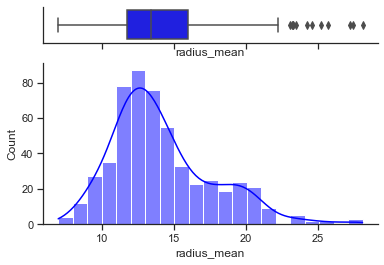

In [105]:
#Histogram and boxplot to visualize the distribution of the data and detection of outliers

sns.set(style="ticks")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.20, .90)})
sns.boxplot(df["radius_mean"], ax =  ax_box, color = "blue")
sns.histplot(df["radius_mean"],ax = ax_hist,  kde = True , color = "blue")
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box)

### Imputation for the df["radius_mean"]

<span style="color:blue">As the fraction of missing values for radius mean is significantly low at 4.9% and there are no extreme outliers. Therefore, using median as an imputation for the missing values.</span>

In [106]:
df['radius_mean'].fillna(df['radius_mean'].median(), inplace=True)

#Confirming whether the missing values are filled with the median

df['radius_mean'].isnull().sum()

#Checking the effect of replacement of missing values with median on the data 

df["radius_mean"].describe()

count    569.000000
mean      14.137253
std        3.443406
min        6.981000
25%       11.840000
50%       13.400000
75%       15.710000
max       28.110000
Name: radius_mean, dtype: float64

### Imputation for the df["area_mean"]

In [107]:
#Getting the summary statistics of the area_mean feature using describe

df["area_mean"].describe()

count     528.000000
mean      659.519697
std       351.435482
min       170.400000
25%       420.875000
50%       555.900000
75%       798.050000
max      2501.000000
Name: area_mean, dtype: float64

C:\Users\Manisha Bhardwaj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


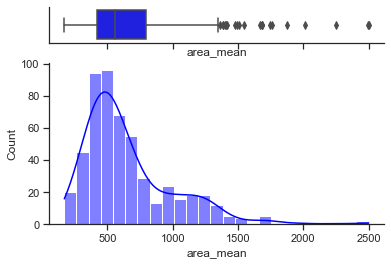

In [108]:
#Histogram and boxplot to visualize the distribution of the data and detection of outliers

sns.set(style="ticks")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.20, .90)})
sns.boxplot(df["area_mean"], ax =  ax_box , color = "blue")
sns.histplot(df["area_mean"],ax = ax_hist,  kde = True, color = "blue")
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box)

In [109]:
#Checking to see the effect of removal of extreme outliers

df_outlierRemove = df.loc[df['area_mean'] < 1500]
df_outlierRemove["area_mean"].describe()

count     515.000000
mean      628.742524
std       292.288397
min       170.400000
25%       420.050000
50%       546.300000
75%       759.950000
max      1491.000000
Name: area_mean, dtype: float64

In [110]:
df['area_mean'].fillna(df['area_mean'].median(), inplace=True)
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_sd                  0
texture_sd                 0
perimeter_sd               0
area_sd                    0
smoothness_sd              0
compactness_sd             0
concavity_sd               0
concave_points_sd          0
symmetry_sd                0
fractal_dimension_sd       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<span style="color:blue">Output is data without any missing values.</span>

 <span style="color:crimson"> Distribution of each of those features with the help of graphs and summary statistics.</span>

In [111]:
#Storing a copy if needed at a later stage (before mapping the values for the diagnosis column)

cell_df= df.copy()

### Distribution plot of the features

In [112]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

                                               Features Distribution                                                


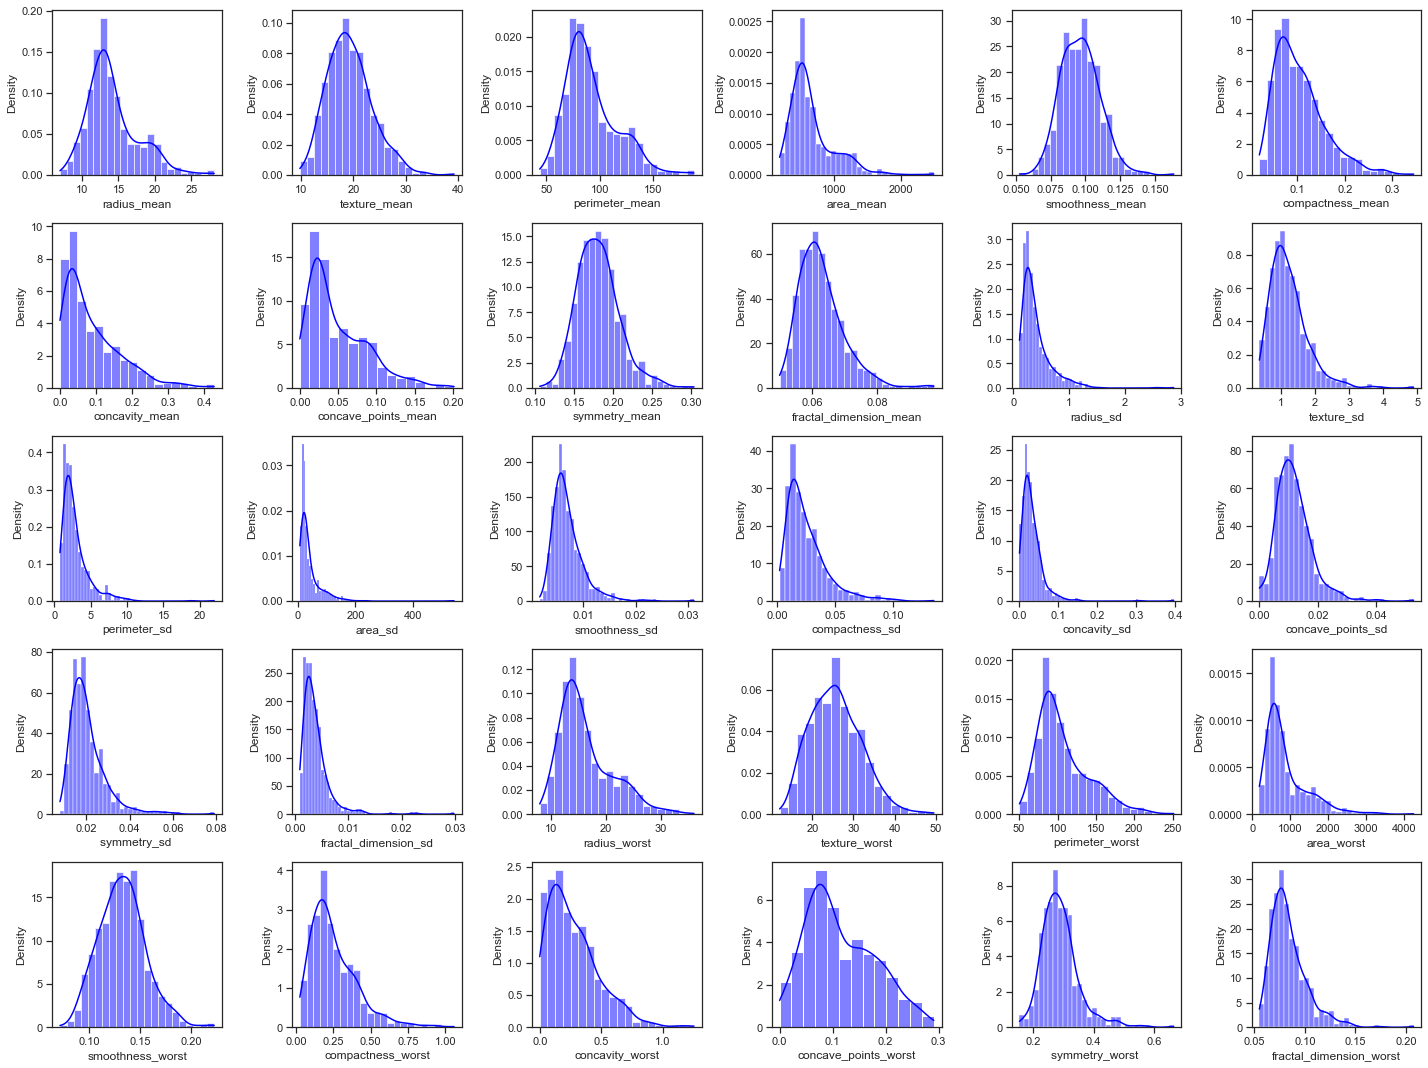

In [114]:
#Histogram plots of all the features

plt.figure(figsize = (20, 15))
plotnumber = 1

print('\033[1mFeatures Distribution'.center(120))
for column in df.iloc[:,2:]:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.histplot(df[column], kde = True, stat = 'density', color = "Blue")
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [115]:
#Checking for the count of unique values under "diagnosis"

df["diagnosis"].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [116]:
#Summary statistics of the features

df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.137253,19.289649,91.969033,652.053251,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.443406,4.301036,24.298981,339.574696,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,170.400000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.840000,16.170000,75.170000,432.000000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.400000,18.840000,86.240000,555.900000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.710000,21.800000,104.100000,758.600000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<span style="color:crimson"> Normalising the data for downstream analysis using min-max scaling. </span>

<span style="color:blue">The scales of the features are not in the similar range. 
Hence, normalising features using the min-max scaling method.  
Our data has multiple features with differences in magnitude, range, and units. Certain features are not in the same unit, such as radius, area and symmetry and certain algorithms are sensitive to these differences. The difference in ranges of features will cause different step sizes of the gradient descent for each feature.                                          
Gradient descent is used as an optimisation technique by certain machine learning algorithms like logistic regression, linear regression, neural network.  
Distance algorithms like KNN, K-means, and SVM use distances between data points to determine their similarity and hence are affected by the range of features.
Therefore, scaling of data is useful in such cases.</span>

In [117]:
#Normalisation using min-max scaling

from sklearn.preprocessing import MinMaxScaler 
norm = MinMaxScaler().fit(df.iloc[:,1:])
norm_df = norm.transform(df.iloc[:,1:])
norm_df = pd.DataFrame(norm_df, columns = df.iloc[:,1:].columns)
norm_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,0.521037,0.022658,0.545989,0.356389,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1.0,0.643144,0.272574,0.615783,0.495838,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1.0,0.601496,0.390260,0.595743,0.443062,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1.0,0.303800,0.360839,0.233501,0.165408,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1.0,0.629893,0.156578,0.630986,0.483395,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


 <span style="color:crimson"> Heatmap of the normalised data with features in rows and observations in
columns. Reordering the columns such that the samples from the same class are grouped
together. k-means clustering on the rows and rearranging them so that features
from the same group lie together. </span>

                   Heatmap with features in rows and observations in columns                    


(31, 569)

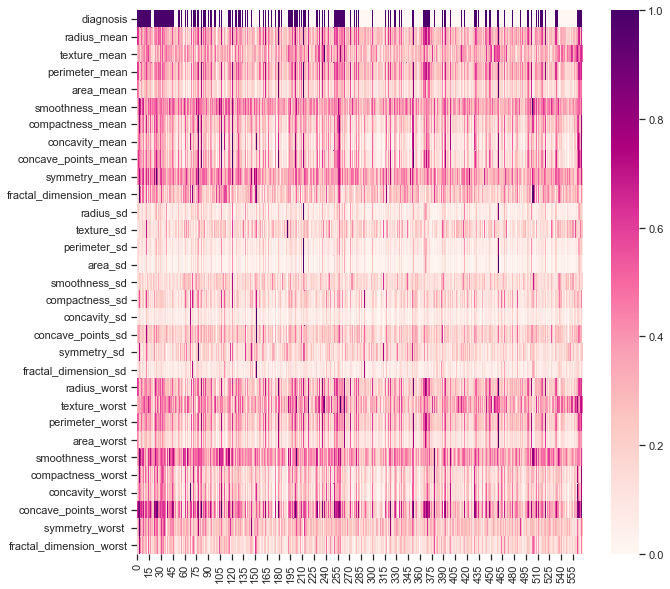

In [118]:
#Heatmap

print('\033[1mHeatmap with features in rows and observations in columns'.center(100))
fig, ax = plt.subplots(figsize=(10,10))   
sns.heatmap(norm_df.T, cmap = "RdPu" ,  mask=None,)
norm_df.T.shape

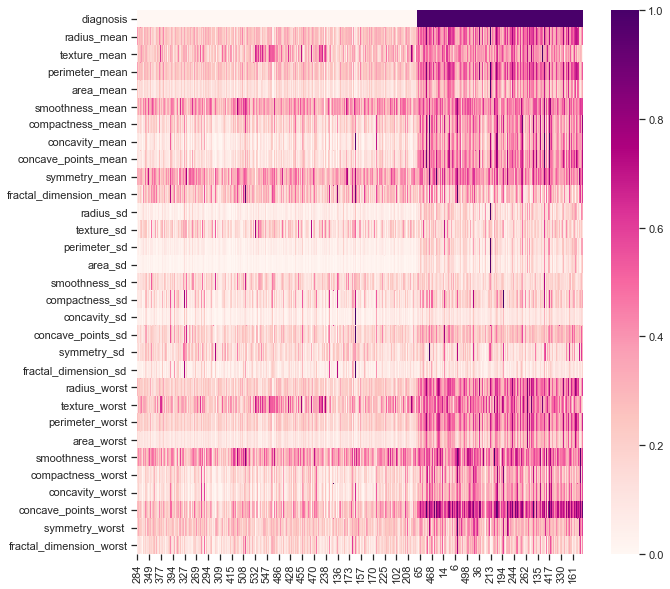

In [119]:
#Reordering the columns such that the samples from the same class are grouped together
    
fig, ax = plt.subplots(figsize=(10,10))
NormSortDf = norm_df.sort_values(by = 'diagnosis')
sns.heatmap(NormSortDf.T, cmap = "RdPu")

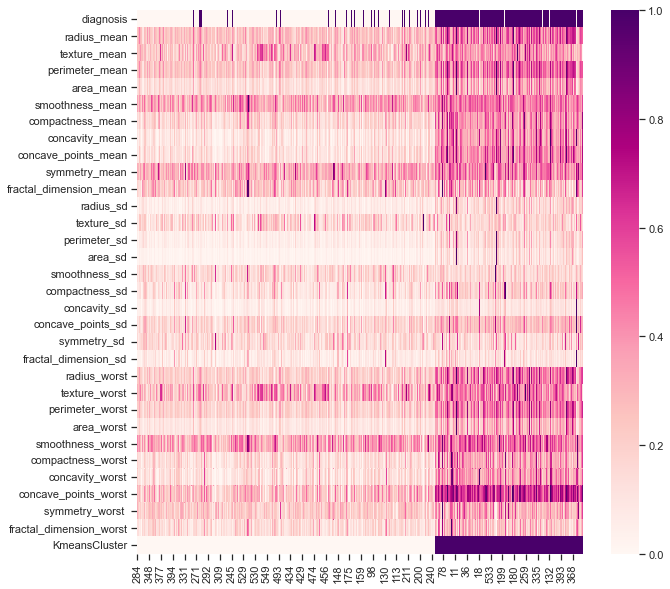

In [120]:
#k-means clustering on the rows and rearranging them so that features from the same group are together

from sklearn.cluster import KMeans
kmeans = KMeans(2)
kmeans.fit(norm_df.iloc[:,1:]) #Includes only features; Excludes "diagnosis" 
identified_clusters = kmeans.fit_predict(norm_df.iloc[:,1:])
len(identified_clusters)
norm_df["KmeansCluster"] = identified_clusters
norm_dfKMSort = norm_df.sort_values("KmeansCluster")


fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(norm_dfKMSort.T, cmap= "RdPu")

<span style="color:blue">1. Rearranging columns based on the diagnosis feature and plotting a heat map of the reordered data shows that the "_mean" and the "_worst" features show clear difference between the two classes whereas the "_sd" features don't show much of a difference in the heatmap.
    
<span style="color:blue">2. The heatmap created from the sorted diagnosis class and Kmeans cluster classified data shows a uniform heatmap indicating relationship between the features and the diagnosis class of the data.</span>

<span style="color:crimson"> Generating a suitable visualization which can help examine the differences in the distribution of the features between the malignant and the benign tumors. </span>

### Boxplot to examine the differences in the distribution of the features between the malignant and the benign tumors

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

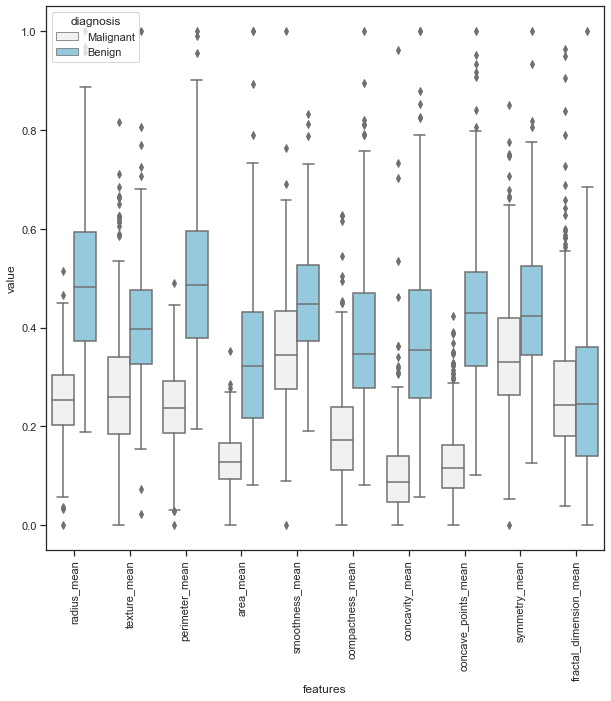

In [121]:
#Using normalised data

data = norm_df.iloc[:,:11]
data = pd.melt(data,id_vars="diagnosis",var_name="features",value_name='value')
plt.figure(figsize=(10,10))
g = sns.boxplot(x="features", y="value", hue="diagnosis", data=data , color = "skyblue")
label_0 = 'Malignant'
g.legend_.texts[0].set_text(label_0)
label_1 = "Benign"
g.legend_.texts[1].set_text(label_1)
plt.xticks(rotation=90)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

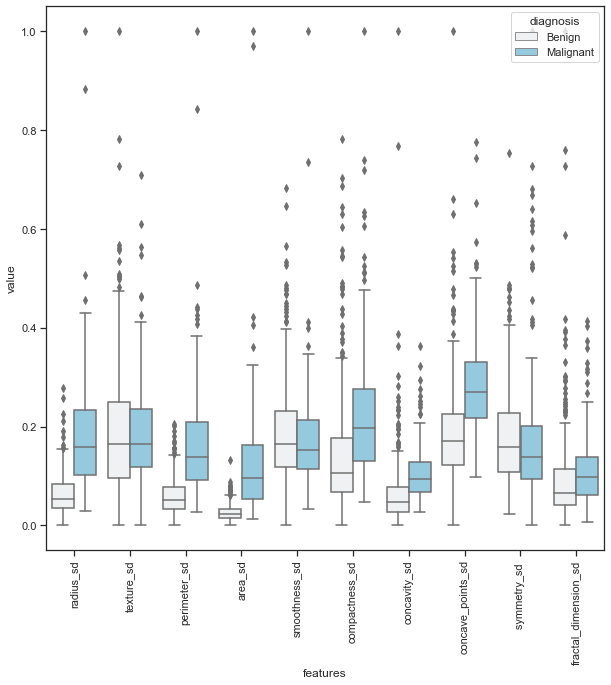

In [122]:
data = pd.concat([norm_df["diagnosis"],norm_df.iloc[:,11:21]], axis = 1)
data = pd.melt(data,id_vars="diagnosis",var_name="features",value_name='value')
plt.figure(figsize=(10,10))
g = sns.boxplot(x="features", y="value", hue="diagnosis", data=data , color = "skyblue")
label_0 = 'Benign'
g.legend_.texts[0].set_text(label_0)
label_1 = "Malignant"
g.legend_.texts[1].set_text(label_1)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

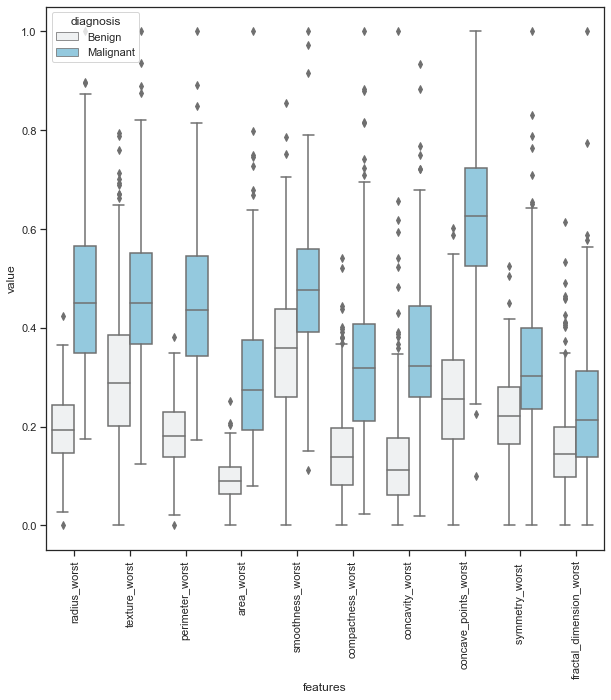

In [123]:
data = pd.concat([norm_df["diagnosis"],norm_df.iloc[:,21:31]], axis = 1)
data = pd.melt(data,id_vars="diagnosis",var_name="features",value_name='value')
plt.figure(figsize=(10,10))
g = sns.boxplot(x="features", y="value", hue="diagnosis", data=data , color = "skyblue")
label_0 = 'Benign'
g.legend_.texts[0].set_text(label_0)
label_1 = "Malignant"
g.legend_.texts[1].set_text(label_1)
plt.xticks(rotation=90)

 # PART - II

<span style="color:crimson"> Performing t-tests for each feature to check if the difference between
the means of the two diagnosis classes (benign/malignant) are significantly different
from each other. </span>


<span style="color:crimson"> a. Compiling the t-test results from all the features in the form of a table with 3
columns - feature name, t-statistic and p-value </span>

In [124]:
#T-test

t_table = pd.DataFrame()
columns = cell_df.iloc[:,2:].columns
for col in columns:
    new = pd.DataFrame(data=cell_df[[col, "diagnosis"]])
    new = new.set_index("diagnosis")
    t = pd.Series(stats.ttest_ind(new.loc['M'], new.loc['B']))
    t_table = t_table.append(t, ignore_index = True)
t_table.insert(0, "feature", cell_df.iloc[:,2:].columns, True)
t_table.columns = ["features", "t-statistics","p-value"]
t_table.head()

,features,t-statistics,p-value
0,radius_mean,[24.126880572769533],[5.01842537088209e-89]
1,texture_mean,[10.86720108146434],[4.0586360478980736e-25]
2,perimeter_mean,[26.405212979192665],[8.43625103617473e-101]
3,area_mean,[22.801183424979772],[3.681265332039257e-82]
4,smoothness_mean,[9.146098808149038],[1.0518503592032013e-18]


<span style="color:crimson"> Reordering the rows of the table by increasing p-value. </span>

In [125]:
t_table_sorted = t_table.sort_values("p-value")
print("Number of significant features =",len(t_table_sorted[t_table_sorted["p-value"] <= 0.05].index))

Number of significant features = 25


<span style="color:blue"> There are 25 significant features.</span>

<span style="color:crimson"> Performing the dimensionality reduction on this dataset with PCA.</span>

                               Principal Component Analysis Plot                                


C:\Users\Manisha Bhardwaj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Second Principal Component')

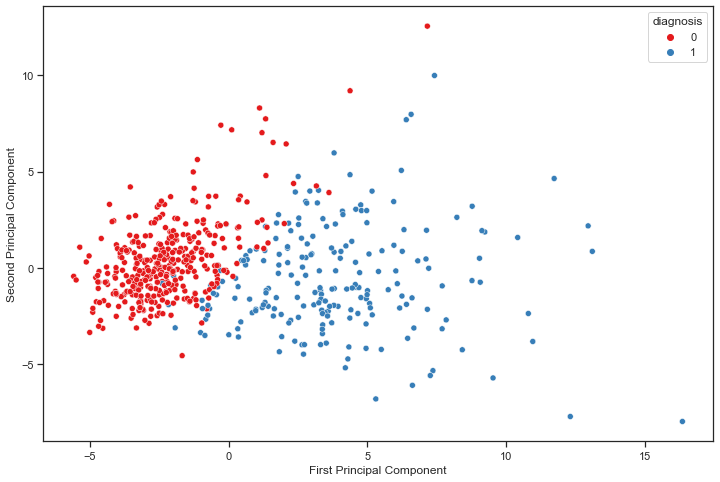

In [126]:
#PCA

print('\033[1mPrincipal Component Analysis Plot'.center(100))
df_features = cell_df.drop(['diagnosis','id'], axis=1)
scaled_data = StandardScaler().fit_transform(df_features)
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
def diag(x):
    if x =='M':
        return 1
    else:
        return 0
df_diag= cell_df['diagnosis'].apply(diag)
ax = plt.figure(figsize=(12,8))
sns.scatterplot(x_pca[:,0], x_pca[:,1], hue=df['diagnosis'], palette ='Set1' )
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

<span style="color:blue">According to the plot the first principal component separates the data into two clusters, the left cluster is for malignant samples whereas as the right cluster is for benign samples. The benign sample data seems to be clustered together well except for a few outliers, such as the one with a PC score between 10 to 15. The malignant cluster on the other hand seems more spread out and distant.</span>

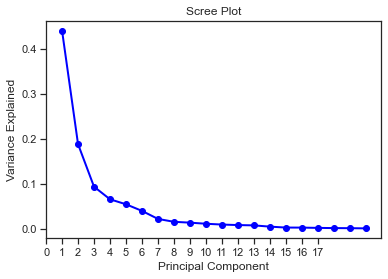

In [127]:
#Scree Plot (question 7a)

pca = PCA(n_components=20)
pca.fit(scaled_data)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.xticks(np.arange(0, 18, step=1))
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [128]:
#Printing cummulative explained variance ratio

print(np.cumsum(pca.explained_variance_ratio_))

[0.44065461 0.6291975  0.72317194 0.78919214 0.84409124 0.88434048
 0.9067407  0.92270213 0.93679545 0.94845047 0.95830873 0.96703592
 0.97507863 0.98031521 0.98349604 0.98658369 0.98902965 0.99104746
 0.9928483  0.99422584]


<span style="color:blue">From the cummulative explained variance data, we can observe that in order to explain a 95% variance in the data about 10 to 11 principal components are needed to explain 95% variance in the data.</span> 

# PART - III

<span style="color:crimson">Building a very simple model using only the top variable to predict the diagnosis class
(benign or malignant). </span>

In [129]:
#Encoding categorical data values

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_ML = cell_df 
data_ML['diagnosis'] = le.fit_transform(data_ML['diagnosis'])

In [130]:
data_ML.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,13.40,20.38,77.58,555.9,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [131]:
# Splitting the dataset into Training and Test set

from sklearn.model_selection import train_test_split
X = cell_df.iloc[:,2:] 
Y = cell_df.iloc[:,1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [132]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [133]:
#Fitting the Logistic Regression Algorithm to the Training Set

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [134]:
#predicting the Test set results

pred = classifier.predict(X_test)

In [135]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        90
           1       0.96      0.94      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.97      0.96       143



In [136]:
#Getting the accuracy of the model

from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test, pred)
print(f' Accuracy : {score * 100}%')

 Accuracy : 96.5034965034965%


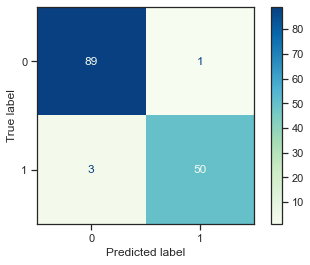

In [137]:
#Creating the confusion matrix

from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


clf = SVC(random_state=0)
clf.fit(X_train, Y_train)

predictions = clf.predict(X_test)
cm = confusion_matrix(Y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot(cmap = 'GnBu')

plt.show()

<span style="color:blue">A model is robust when the accuracy does not change significantly from the base line accuracy under various conditions. There are various metrics for model robustness depending on the dataset and model. In our datset, we could use the following techniques to check for it's robustness -

    
<span style="color:blue">1. Feature space partitioning: Data can be partitioned by splitting the features and accuracy is calculated for each.
    
<span style="color:blue">2. Ensemble of models based on partioning: Data can be partitioned and a separate model is trained for each partition with same parameters. Accuracy is then calculated for each model.
    
<span style="color:blue">3. Distribution shift: Data distribution can be shifted by applying a transformation to the features followed by calculation of accuracy for various shifts</span>